In [3]:
import tensorflow as tf

cnn = tf.keras.models.load_model('cifar10_accuracy_82v1.h5')
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [4]:
from glob import glob

test_image_data_list = glob('my_test_image/*')

labels = []

for idx in range(len(test_image_data_list)):
    labels.append(test_image_data_list[idx].split('/')[1].split('.')[0])

print(labels)

['flog', 'truck', 'deer', 'fighter', 'cat', 'dog', 'dog', 'dog', 'cat', 'horse', 'house', 'flog']


In [5]:
test_image_data_list

['my_test_image/flog.123.jpg',
 'my_test_image/truck.23.jpg',
 'my_test_image/deer.1.webp',
 'my_test_image/fighter.1.jpg',
 'my_test_image/cat.2.jpg',
 'my_test_image/dog.6331.jpg',
 'my_test_image/dog.4.jpg',
 'my_test_image/dog.3.jpg',
 'my_test_image/cat.9.jpg',
 'my_test_image/horse.1.jpg',
 'my_test_image/house.23.jpg',
 'my_test_image/flog.1.jpg']

In [ ]:
import cv2

src_list = []
dst_list = []

for idx in range(len(test_image_data_list)):

    src_img = cv2.imread(test_image_data_list[idx], cv2.IMREAD_COLOR)
    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    dst_img = cv2.resize(dst_img, dsize=(32,32))
    dst_img = dst_img / 255.0

    print(src_img.shape, dst_img.shape)

    src_list.append(src_img)
    dst_list.append(dst_img)

(136, 200, 3) (32, 32, 3)
(560, 560, 3) (32, 32, 3)
(224, 225, 3) (32, 32, 3)
(332, 500, 3) (32, 32, 3)


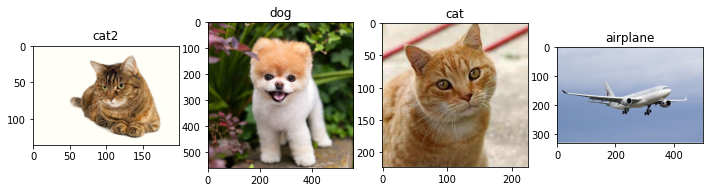

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

for idx in range(len(src_list)):
    plt.subplot(1,len(src_list),idx+1)
    tmp = cv2.cvtColor(src_list[idx], cv2.COLOR_BGR2RGB)
    plt.imshow(tmp)
    plt.title(labels[idx])
plt.show()


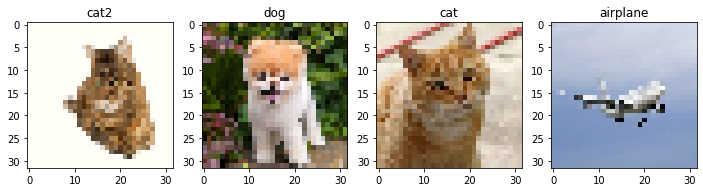

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

for idx in range(len(dst_list)):
    plt.subplot(1,len(dst_list),idx+1)
    plt.imshow(dst_list[idx])
    plt.title(labels[idx])
plt.show()


In [ ]:
import numpy as np
test_data = np.array(dst_list)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
pred = cnn.predict(test_data)
pred.shape

(4, 10)

In [ ]:
for index in range(len(pred)):

    class_index = np.argmax(pred[index])
    print('prediction => ',class_names[class_index], pred[index].max())

prediction =>  cat 0.9993635
prediction =>  dog 0.9174402
prediction =>  dog 0.9508884
prediction =>  airplane 1.0


In [ ]:
top3 = 3

for index in range(len(pred)):

    sorted_index = pred[index].argsort()  # 오름차순으로 인덱스 정렬
    sorted_index = sorted_index[::-1]     # 내림차순으로 인덱스 정렬

    print('=====================================')
    print(sorted_index)
    
    for j in range(top3):
        pred_val = pred[index, sorted_index[j]]
        class_index = sorted_index[j]
        print('prediction => ',class_names[class_index], pred_val)
        

[3 5 6 7 2 4 9 0 1 8]
prediction =>  cat 0.9993635
prediction =>  dog 0.00063507323
prediction =>  frog 1.0616955e-06
[5 4 3 7 2 6 0 9 1 8]
prediction =>  dog 0.9174402
prediction =>  deer 0.039465647
prediction =>  cat 0.020931313
[5 3 6 7 4 2 8 9 1 0]
prediction =>  dog 0.9508884
prediction =>  cat 0.035632446
prediction =>  frog 0.009060885
[0 2 8 4 3 9 6 5 7 1]
prediction =>  airplane 1.0
prediction =>  bird 2.4126313e-08
prediction =>  ship 3.5874075e-11
